# Supervised Learning Challenge
IMT Atlantique - IT Msc 2022

*Authors:*

1. *Miguel Ángel Guzmán Sánchez*

2. *Kadriye Nur Bakirci*

3. *Mahammat Nour Ali Mai*

4. *Santiago Guerra*

5. *Shikhar Saini*

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import glob
import os


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

In [26]:
path1 = 'HGS/2113/'
directories1 = os.listdir(path1)
columns1 = ['s'+str(i) for i in range(1,19)]
columns1 = ['instance','cost_solution'] + columns1

In [27]:
path2 = 'HGS/2213/'
directories2 = os.listdir(path2)
columns2 = ['s'+str(i) for i in range(1,19)]
columns2 = ['instance','cost_solution'] + columns2

In [28]:
path3 = 'HGS/3113/'
directories3 = os.listdir(path3)
columns3 = ['s'+str(i) for i in range(1,19)]
columns3 = ['instance','cost_solution'] + columns3

In [29]:
path4 = 'HGS/3213/'
directories4 = os.listdir(path4)
columns4 = ['s'+str(i) for i in range(1,19)]
columns4 = ['instance','cost_solution'] + columns4

In [30]:
dfs = [pd.read_csv(path1 + i, sep=';',names = columns1) for i in directories1]
df_2113 = pd.concat(dfs)
df_2113.head()

instance  cost_solution       s1        s2      s3      s4     s5  \
0  XML100_2113_01          13063  257.768  105.0410  0.2078  0.0803  534.2   
1  XML100_2113_01          13237  201.777   57.7145  0.1561  0.0349  576.7   
2  XML100_2113_01          13168  225.720  114.3020  0.1653  0.0572  552.8   
3  XML100_2113_01          13168  243.308  164.7820  0.2140  0.1242  539.6   
4  XML100_2113_01          13000  195.334  102.7790  0.1588  0.1049  563.7   

         s6  s7     s8      s9     s10    s11     s12     s13     s14  \
0  133.2030   0  294.4  0.2274  0.1524  446.5  0.2066  0.1033  0.0207   
1   74.8466   0  302.6  0.2275  0.1691  420.3  0.2113  0.1057  0.0321   
2  112.2280   0  279.4  0.2105  0.1649  430.8  0.2062  0.1031  0.0202   
3  157.2250   0  297.6  0.2452  0.1512  432.2  0.3636  0.1818  0.2727   
4   79.7384   0  294.2  0.2256  0.1720  416.4  0.2074  0.1037  0.0233   

       s15      s16     s17     s18  
0  327.901  482.077  1.6125  3.5971  
1  187.524  489.225  1.7889  4.1107  
2  307.325  484.538  1.5492  3.7572  
3  403.127  467.493  3.0000  3.5150  
4  213.558  490.165  1.6125  3.9475

In [31]:
dfs = [pd.read_csv(path2 + i, sep=';',names = columns2) for i in directories2]
df_2213 = pd.concat(dfs)
df_2213.head()

instance  cost_solution       s1        s2      s3      s4       s5  \
0  XML100_2213_01          12631  177.332  151.6830  0.1595  0.1951  448.667   
1  XML100_2213_01          13077  139.027   87.2691  0.1975  0.3319  464.500   
2  XML100_2213_01          12704  105.298   43.4592  0.1354  0.1814  467.250   
3  XML100_2213_01          13089  182.503  147.4230  0.2094  0.3217  449.667   
4  XML100_2213_01          12987  119.682   99.9362  0.0968  0.1068  449.692   

         s6  s7       s8      s9     s10      s11     s12     s13     s14  \
0  100.1710   0  339.750  0.3324  0.1427  580.333  0.2639  0.1319  0.0609   
1   89.4907   0  377.750  0.3434  0.1486  596.833  0.2486  0.1243  0.0275   
2   84.1022   0  366.333  0.3469  0.1485  591.250  0.2639  0.1319  0.0609   
3   98.6250   0  393.167  0.3593  0.1582  595.583  0.2444  0.1222  0.0178   
4  101.3650   0  335.692  0.3524  0.1168  577.231  0.4231  0.2115  0.2497   

       s15      s16     s17     s18  
0  293.076  388.511  1.6499  4.1027  
1  360.272  388.270  1.3123  4.1524  
2  294.291  397.296  1.6499  3.9658  
3  427.137  376.634  1.0274  3.9811  
4  267.279  388.247  2.6713  3.6566

In [32]:
dfs = [pd.read_csv(path3 + i, sep=';',names = columns3) for i in directories3]
df_3113 = pd.concat(dfs)
df_3113.head()

instance  cost_solution       s1        s2      s3      s4       s5  \
0  XML100_3113_01          25583  192.706   93.5708  0.0869  0.0534  919.538   
1  XML100_3113_01          25562  150.776   69.2221  0.0744  0.0446  938.846   
2  XML100_3113_01          25604  214.452  174.8470  0.0899  0.0524  905.846   
3  XML100_3113_01          25376  153.457   79.1615  0.0658  0.0388  928.231   
4  XML100_3113_01          25532  164.529   74.7683  0.0860  0.0662  931.538   

        s6  s7       s8      s9     s10      s11     s12     s13     s14  \
0  267.955   0  712.154  0.3559  0.1421  1207.08  0.2619  0.1310  0.0121   
1  271.543   0  685.385  0.3405  0.1393  1167.08  0.2692  0.1346  0.0333   
2  279.545   0  750.846  0.3772  0.1569  1214.69  0.2619  0.1310  0.0121   
3  268.949   0  690.846  0.3475  0.1517  1162.15  0.2628  0.1314  0.0150   
4  283.948   0  692.385  0.3497  0.1405  1195.62  0.2643  0.1321  0.0202   

       s15      s16     s17     s18  
0  566.015  471.008  0.6057  5.1718  
1  566.737  477.137  1.0659  5.9176  
2  653.603  464.373  0.6057  5.0352  
3  564.766  471.981  0.7216  5.6143  
4  589.663  472.957  0.8213  5.2788

In [35]:
dfs = [pd.read_csv(path4 + i, sep=';',names = columns4) for i in directories4]
df_3213 = pd.concat(dfs)
df_3213.head()

MemoryError: Unable to allocate 24.0 MiB for an array with shape (17, 185305) and data type float64

In [24]:
#Merging of all datasets 
df = pd.concat([df_2113, df_2213,df_3113,df_3213], keys = ['key1', 'key2','key3','key4'])

MemoryError: Unable to allocate 108. MiB for an array with shape (14109514,) and data type int64

In [21]:
df.sample(10)

MemoryError: Unable to allocate 1.79 GiB for an array with shape (17, 14109514) and data type float64

## Exploratory Data Analysis

In [16]:
#change column name of dataset to incrase understandblity
# Changing column names
data = df.rename({'instance': 'Instance_name',
                'cost_solution': 'Cost_of_the_solution',
                's1':'S01',
                's2': 'S02',
                's3': 'S03',
                's4': 'S04',
                's5': 'S05',
                's6': 'S06',
                's7': 'S07',
                's8': 'S08',
                's9': 'S09',
                's10': 'S10',
                's11': 'S11',
                's12': 'S12',
                's13': 'S13',
                's14': 'S14',
                's15': 'S15',
                's16': 'S16',
                's17': 'S17',
                's18': 'S18'}, axis=1)

In [17]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
       'S15', 'S16', 'S17', 'S18'],
      dtype='object')

In [19]:
data.head()

Instance_name  Cost_of_the_solution      S01       S02     S03  \
key1 0  XML100_2113_01                 13063  257.768  105.0410  0.2078   
     1  XML100_2113_01                 13237  201.777   57.7145  0.1561   
     2  XML100_2113_01                 13168  225.720  114.3020  0.1653   
     3  XML100_2113_01                 13168  243.308  164.7820  0.2140   
     4  XML100_2113_01                 13000  195.334  102.7790  0.1588   

           S04    S05       S06  S07    S08     S09     S10    S11     S12  \
key1 0  0.0803  534.2  133.2030    0  294.4  0.2274  0.1524  446.5  0.2066   
     1  0.0349  576.7   74.8466    0  302.6  0.2275  0.1691  420.3  0.2113   
     2  0.0572  552.8  112.2280    0  279.4  0.2105  0.1649  430.8  0.2062   
     3  0.1242  539.6  157.2250    0  297.6  0.2452  0.1512  432.2  0.3636   
     4  0.1049  563.7   79.7384    0  294.2  0.2256  0.1720  416.4  0.2074   

           S13     S14      S15      S16     S17     S18  
key1 0  0.1033  0.0207  327.901  482.077  1.6125  3.5971  
     1  0.1057  0.0321  187.524  489.225  1.7889  4.1107  
     2  0.1031  0.0202  307.325  484.538  1.5492  3.7572  
     3  0.1818  0.2727  403.127  467.493  3.0000  3.5150  
     4  0.1037  0.0233  213.558  490.165  1.6125  3.9475

In [362]:
#Get the shape of the dataframe
print(f'Dataset shape:\n{data.shape}\n')

#Get the names of the attributes
print(f'Dataset attributes:\n{data.columns}\n')

#Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{data.info()}\n')

#Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{data.describe()}\n')

#Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{data.describe(include = object)}')

Dataset shape:
(22823, 20)

Dataset attributes:
Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
       'S15', 'S16', 'S17', 'S18'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instance_name         22823 non-null  object 
 1   Cost_of_the_solution  22823 non-null  int64  
 2   S01                   22823 non-null  float64
 3   S02                   22823 non-null  float64
 4   S03                   22823 non-null  float64
 5   S04                   22823 non-null  float64
 6   S05                   22823 non-null  float64
 7   S06                   22823 non-null  float64
 8   S07                   22823 non-null  int64  
 9   S08                   22823 non-null  float64
 10  S09           

In [363]:
#Check for any null values 
print(f'Null Values per Feature\n{data.isnull().sum()}\n')

Null Values per Feature
Instance_name           0
Cost_of_the_solution    0
S01                     0
S02                     0
S03                     0
S04                     0
S05                     0
S06                     0
S07                     0
S08                     0
S09                     0
S10                     0
S11                     0
S12                     0
S13                     0
S14                     0
S15                     0
S16                     0
S17                     0
S18                     0
dtype: int64



We don't have any null values in our dataset. That's why we don't need to implement any tecniques for handling with null values. But after examination our dataset, we notice that our dataset have one column which is "SO7" that includes only zero values. So it is useful to drop that column since it doesn't have any information.

In [364]:
#Dropping column with miscalculation
data.drop(['S07'], axis=1, inplace=True)

In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instance_name         22823 non-null  object 
 1   Cost_of_the_solution  22823 non-null  int64  
 2   S01                   22823 non-null  float64
 3   S02                   22823 non-null  float64
 4   S03                   22823 non-null  float64
 5   S04                   22823 non-null  float64
 6   S05                   22823 non-null  float64
 7   S06                   22823 non-null  float64
 8   S08                   22823 non-null  float64
 9   S09                   22823 non-null  float64
 10  S10                   22823 non-null  float64
 11  S11                   22823 non-null  float64
 12  S12                   22823 non-null  float64
 13  S13                   22823 non-null  float64
 14  S14                   22823 non-null  float64
 15  S15                

## Univariate Analysis

In [366]:
data.head(10)

Instance_name  Cost_of_the_solution      S01       S02     S03     S04  \
0  XML100_2113_01                 13063  257.768  105.0410  0.2078  0.0803   
1  XML100_2113_01                 13237  201.777   57.7145  0.1561  0.0349   
2  XML100_2113_01                 13168  225.720  114.3020  0.1653  0.0572   
3  XML100_2113_01                 13168  243.308  164.7820  0.2140  0.1242   
4  XML100_2113_01                 13000  195.334  102.7790  0.1588  0.1049   
5  XML100_2113_01                 13207  251.384  107.3840  0.1999  0.1005   
6  XML100_2113_01                 13278  256.225  106.6140  0.2884  0.2706   
7  XML100_2113_01                 13251  241.530  155.7650  0.1747  0.0968   
8  XML100_2113_01                 12985  208.343   87.8099  0.1840  0.1112   
9  XML100_2113_01                 12985  275.080  140.7500  0.2519  0.1224   

     S05       S06    S08     S09     S10    S11     S12     S13     S14  \
0  534.2  133.2030  294.4  0.2274  0.1524  446.5  0.2066  0.1033  0.0207   
1  576.7   74.8466  302.6  0.2275  0.1691  420.3  0.2113  0.1057  0.0321   
2  552.8  112.2280  279.4  0.2105  0.1649  430.8  0.2062  0.1031  0.0202   
3  539.6  157.2250  297.6  0.2452  0.1512  432.2  0.3636  0.1818  0.2727   
4  563.7   79.7384  294.2  0.2256  0.1720  416.4  0.2074  0.1037  0.0233   
5  544.5  110.3260  292.3  0.2193  0.1425  457.3  0.2031  0.1016  0.0133   
6  509.0  147.8570  329.9  0.2552  0.1327  528.4  0.2343  0.1172  0.0723   
7  545.6  108.5970  282.8  0.2101  0.1668  402.8  0.2049  0.1024  0.0174   
8  552.6  100.9510  289.6  0.2263  0.1719  395.8  0.2062  0.1031  0.0202   
9  514.5  166.2290  324.3  0.2667  0.1153  479.8  0.3636  0.1818  0.2727   

       S15      S16     S17     S18  
0  327.901  482.077  1.6125  3.5971  
1  187.524  489.225  1.7889  4.1107  
2  307.325  484.538  1.5492  3.7572  
3  403.127  467.493  3.0000  3.5150  
4  213.558  490.165  1.6125  3.9475  
5  297.915  490.419  1.1832  3.5627  
6  355.041  485.796  2.4083  3.0963  
7  296.475  486.387  1.4142  4.1102  
8  204.920  486.163  1.5492  4.2083  
9  412.016  463.648  3.0000  2.9650

In [367]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18'],
      dtype='object')

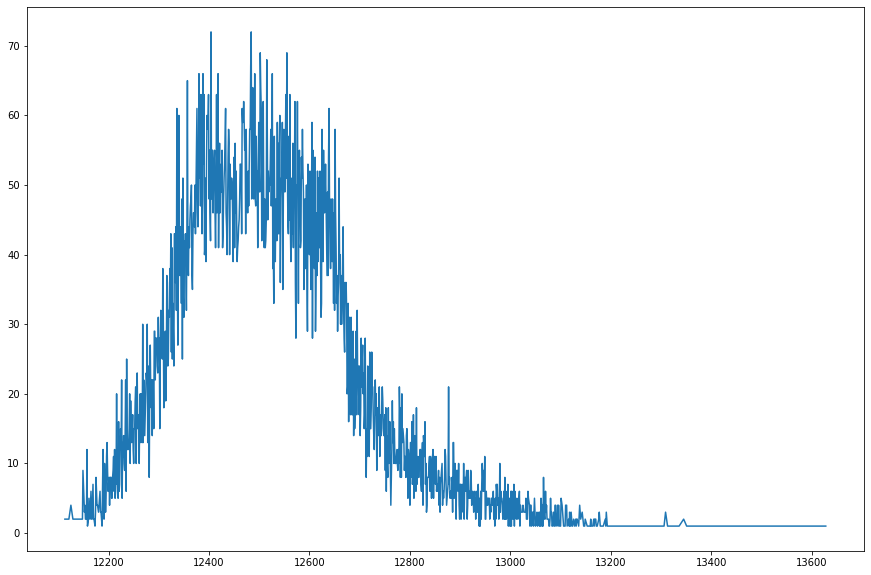

In [368]:
plt.figure(figsize=(15,10))
data['Cost_of_the_solution'].value_counts().sort_index().plot.line()


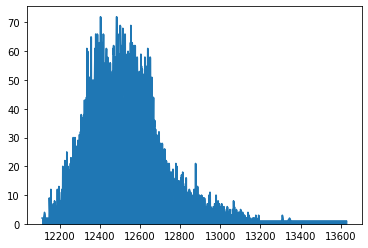

In [369]:
data['Cost_of_the_solution'].value_counts().sort_index().plot.area()


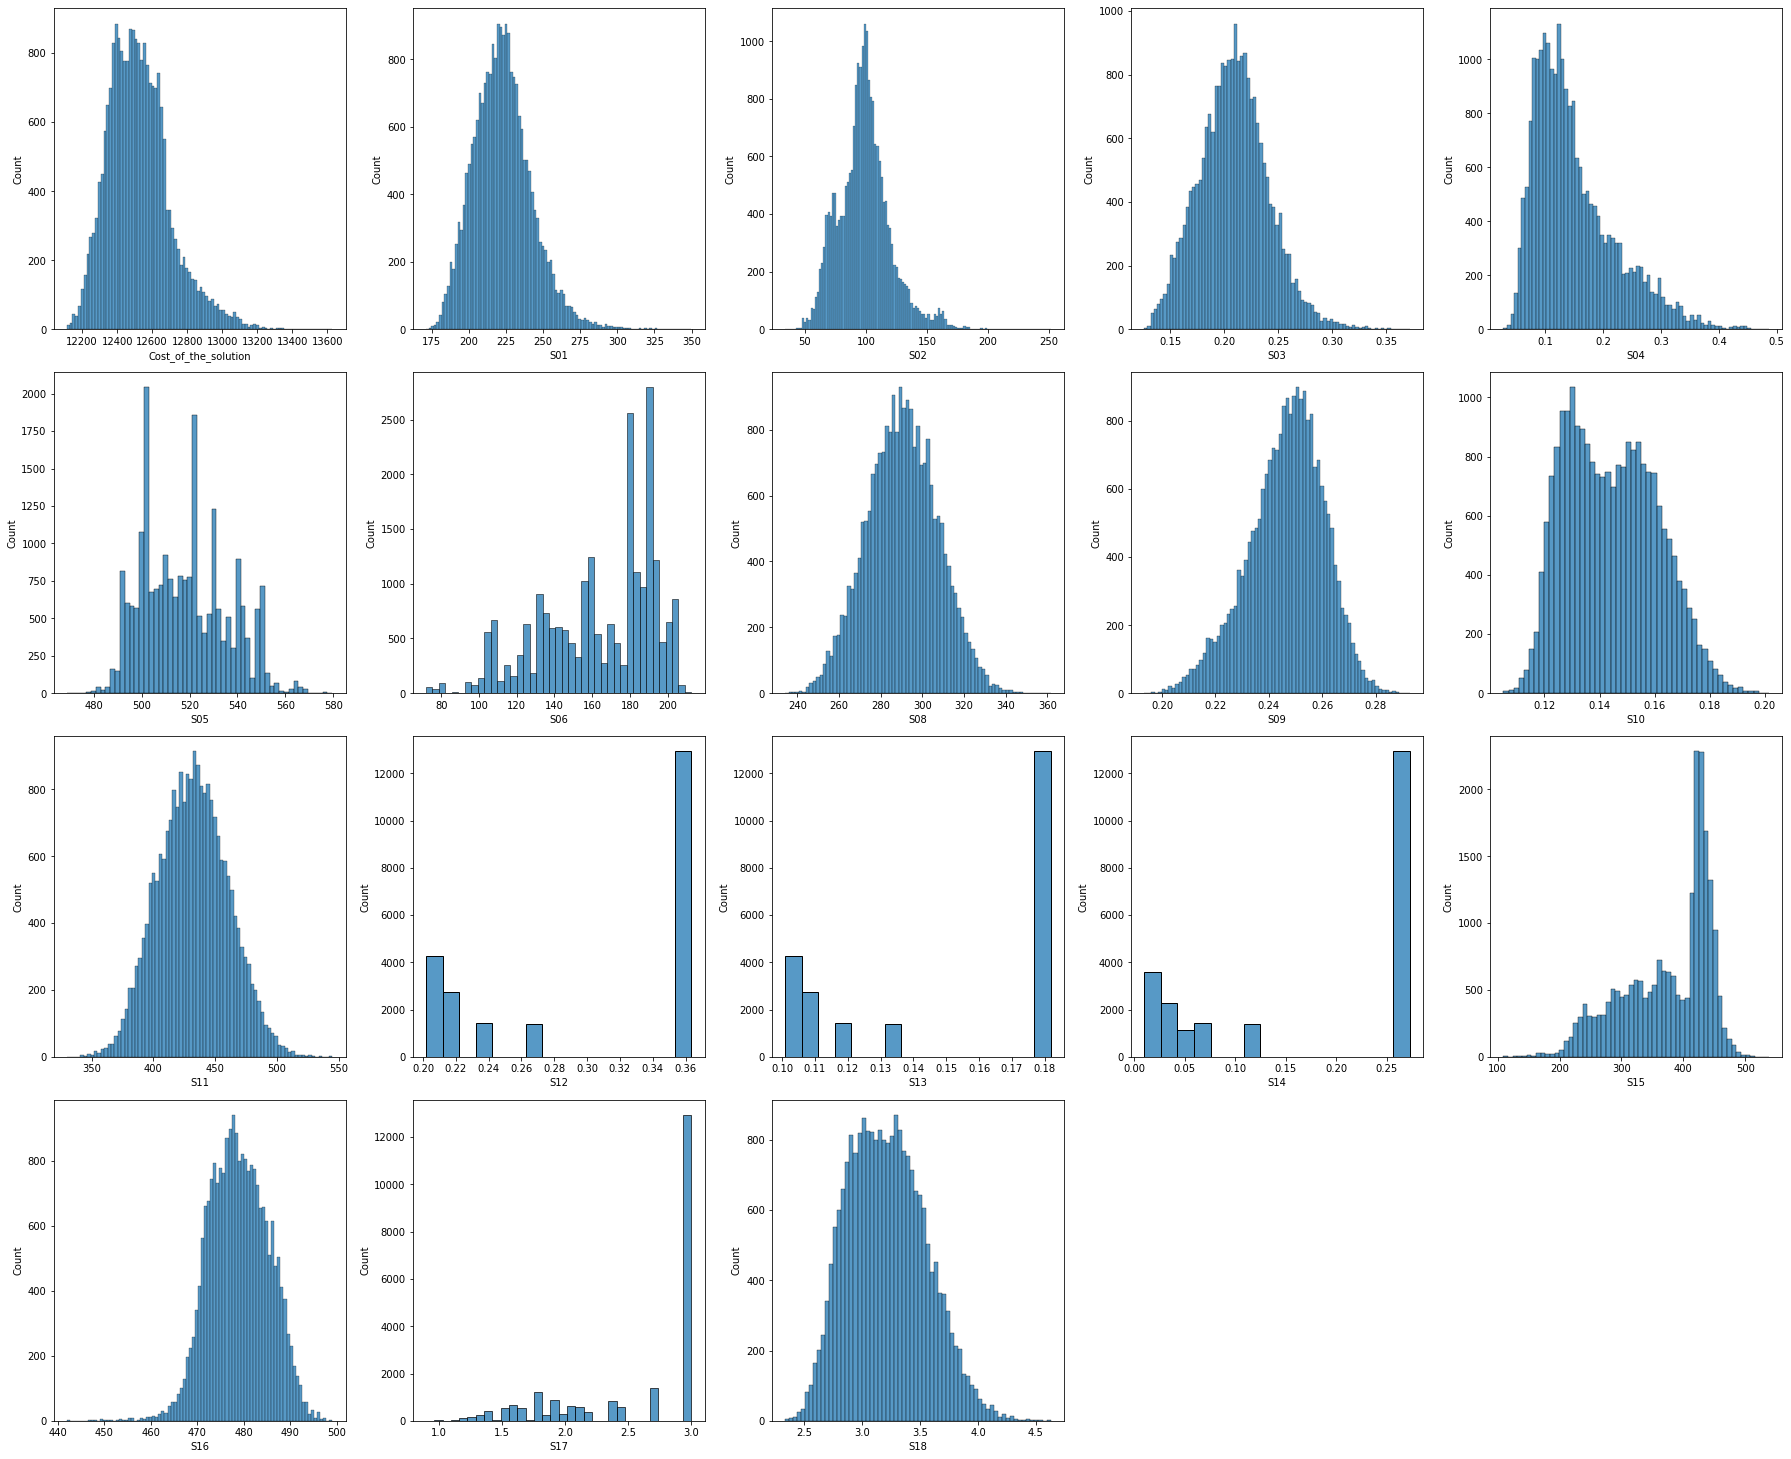

In [370]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

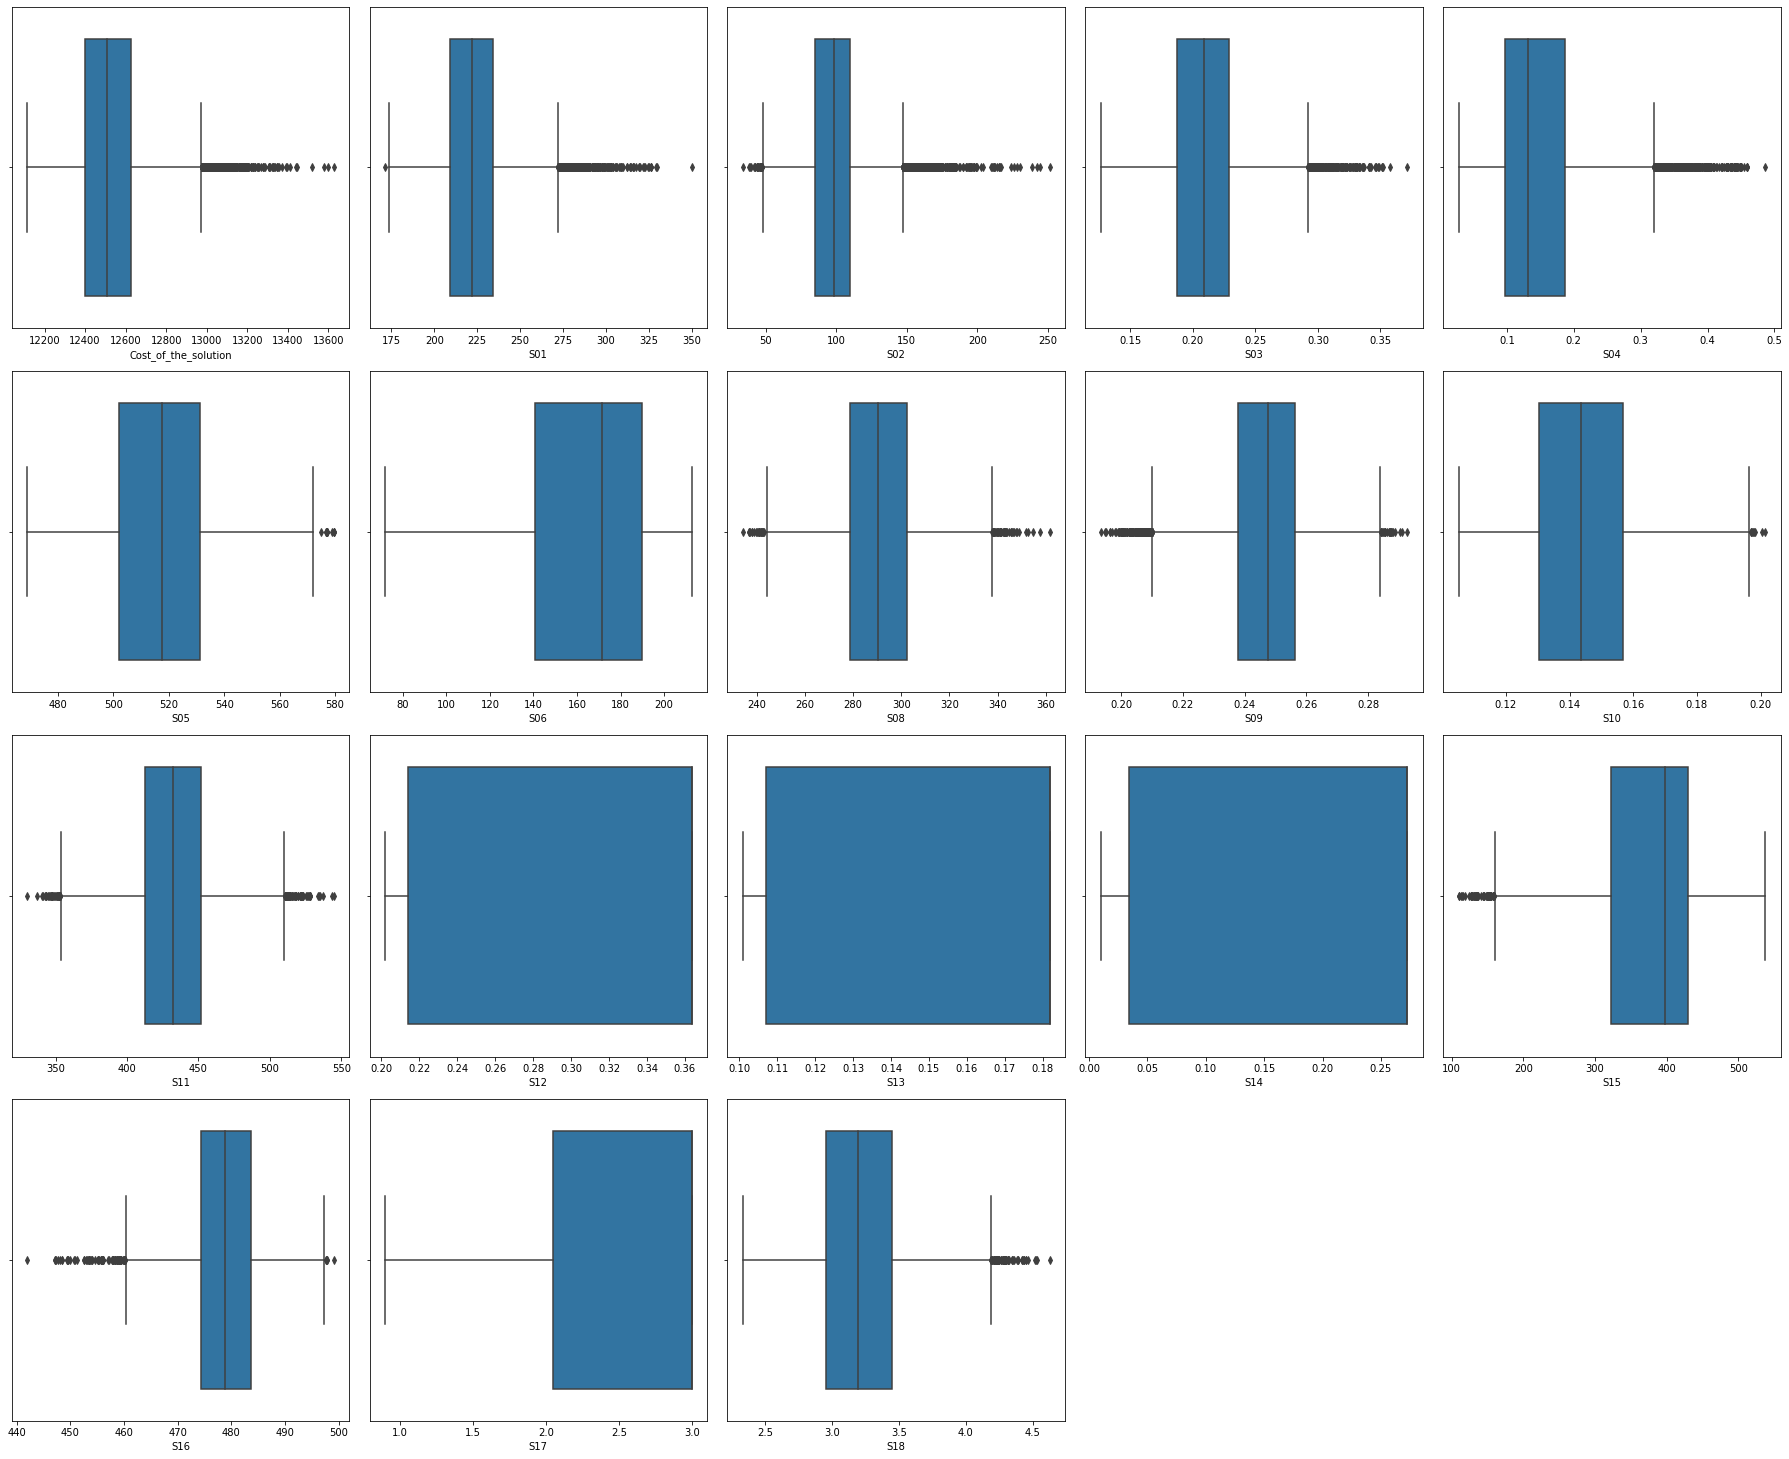

In [371]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

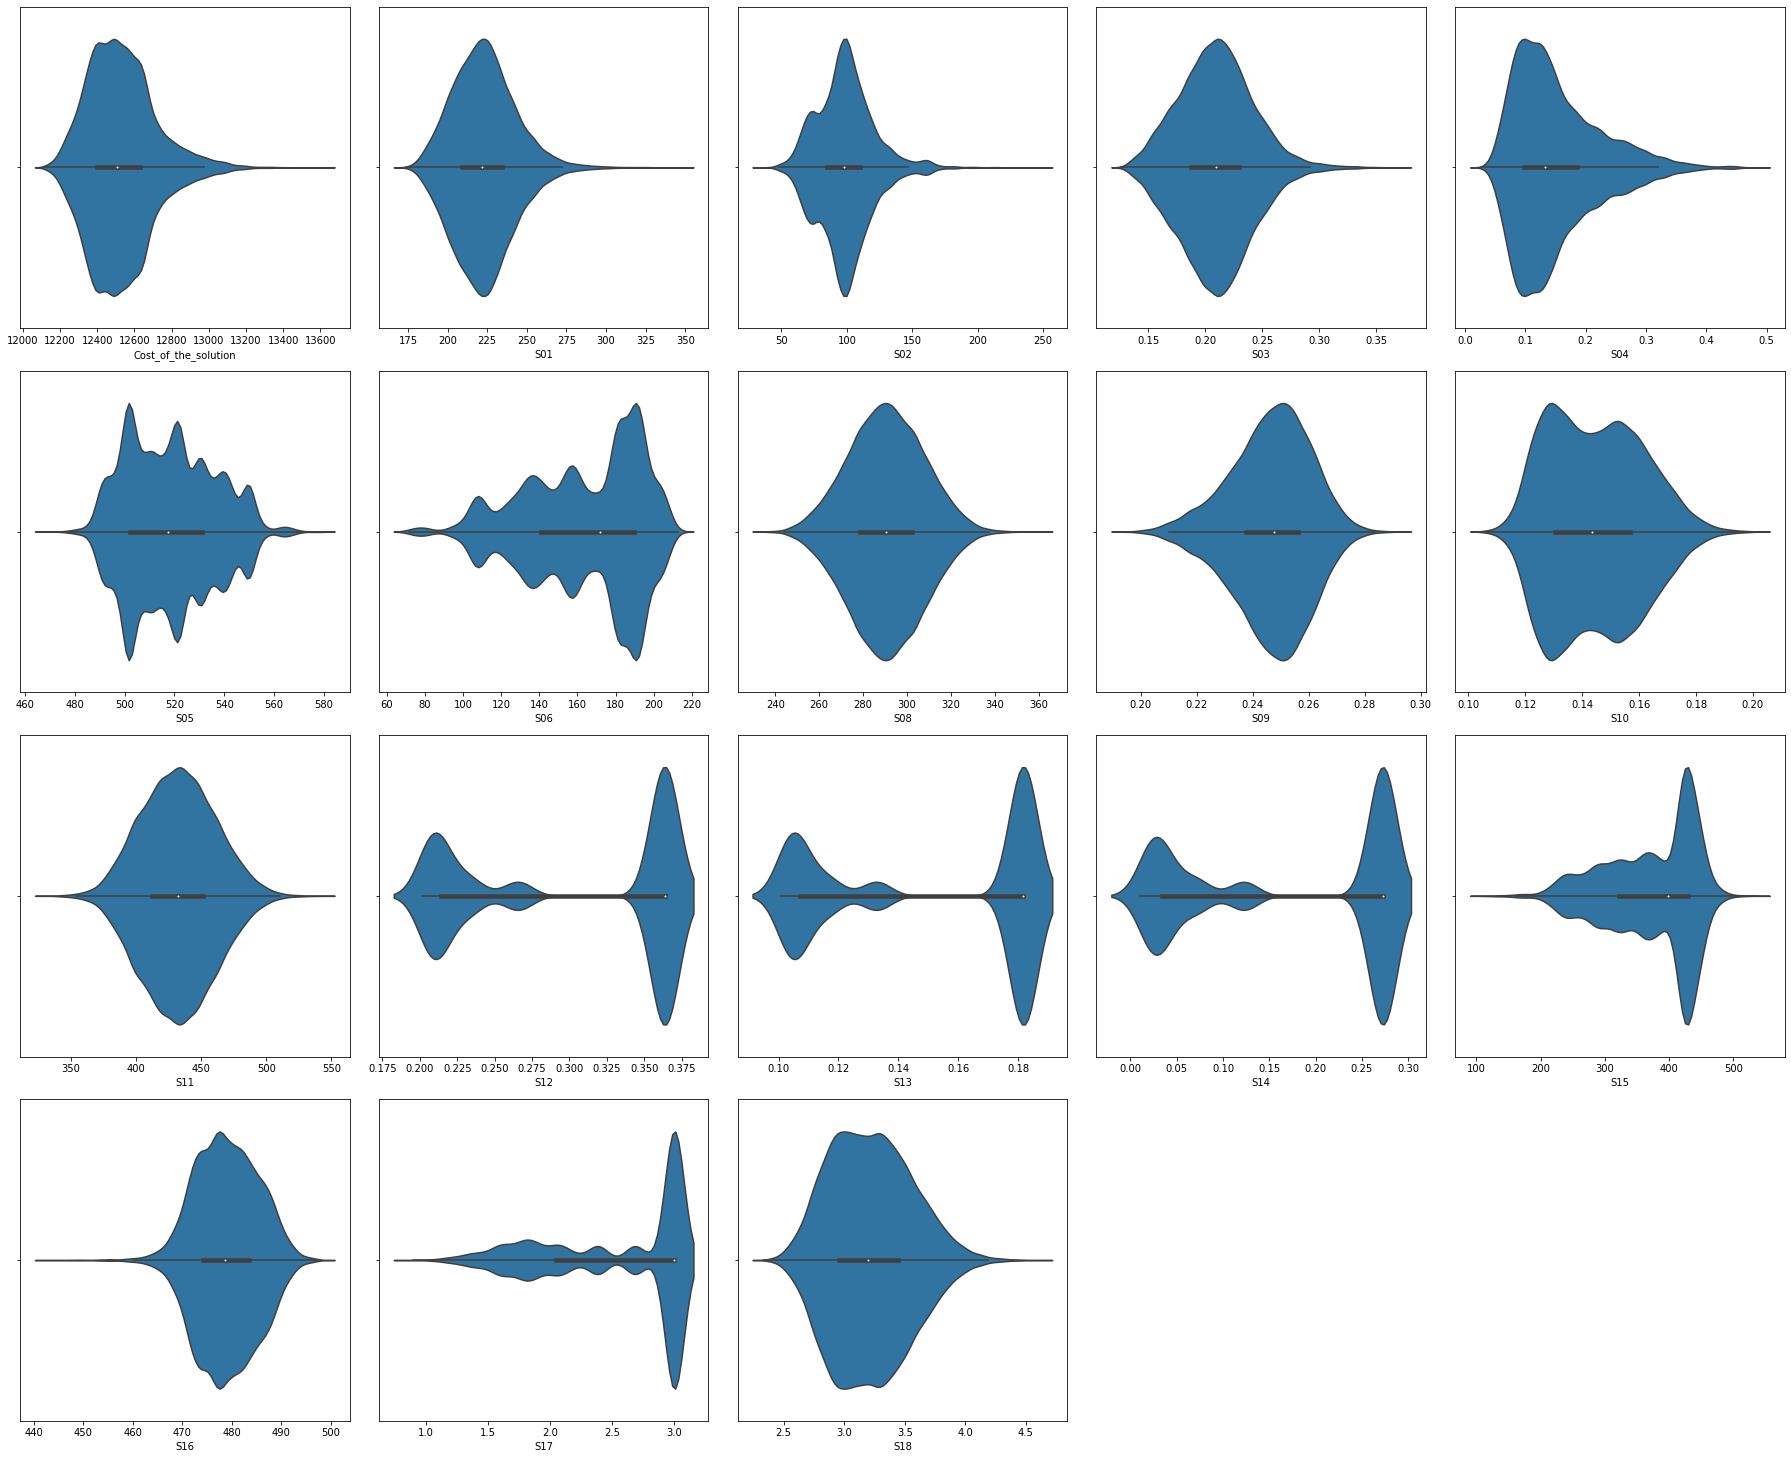

In [372]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.violinplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

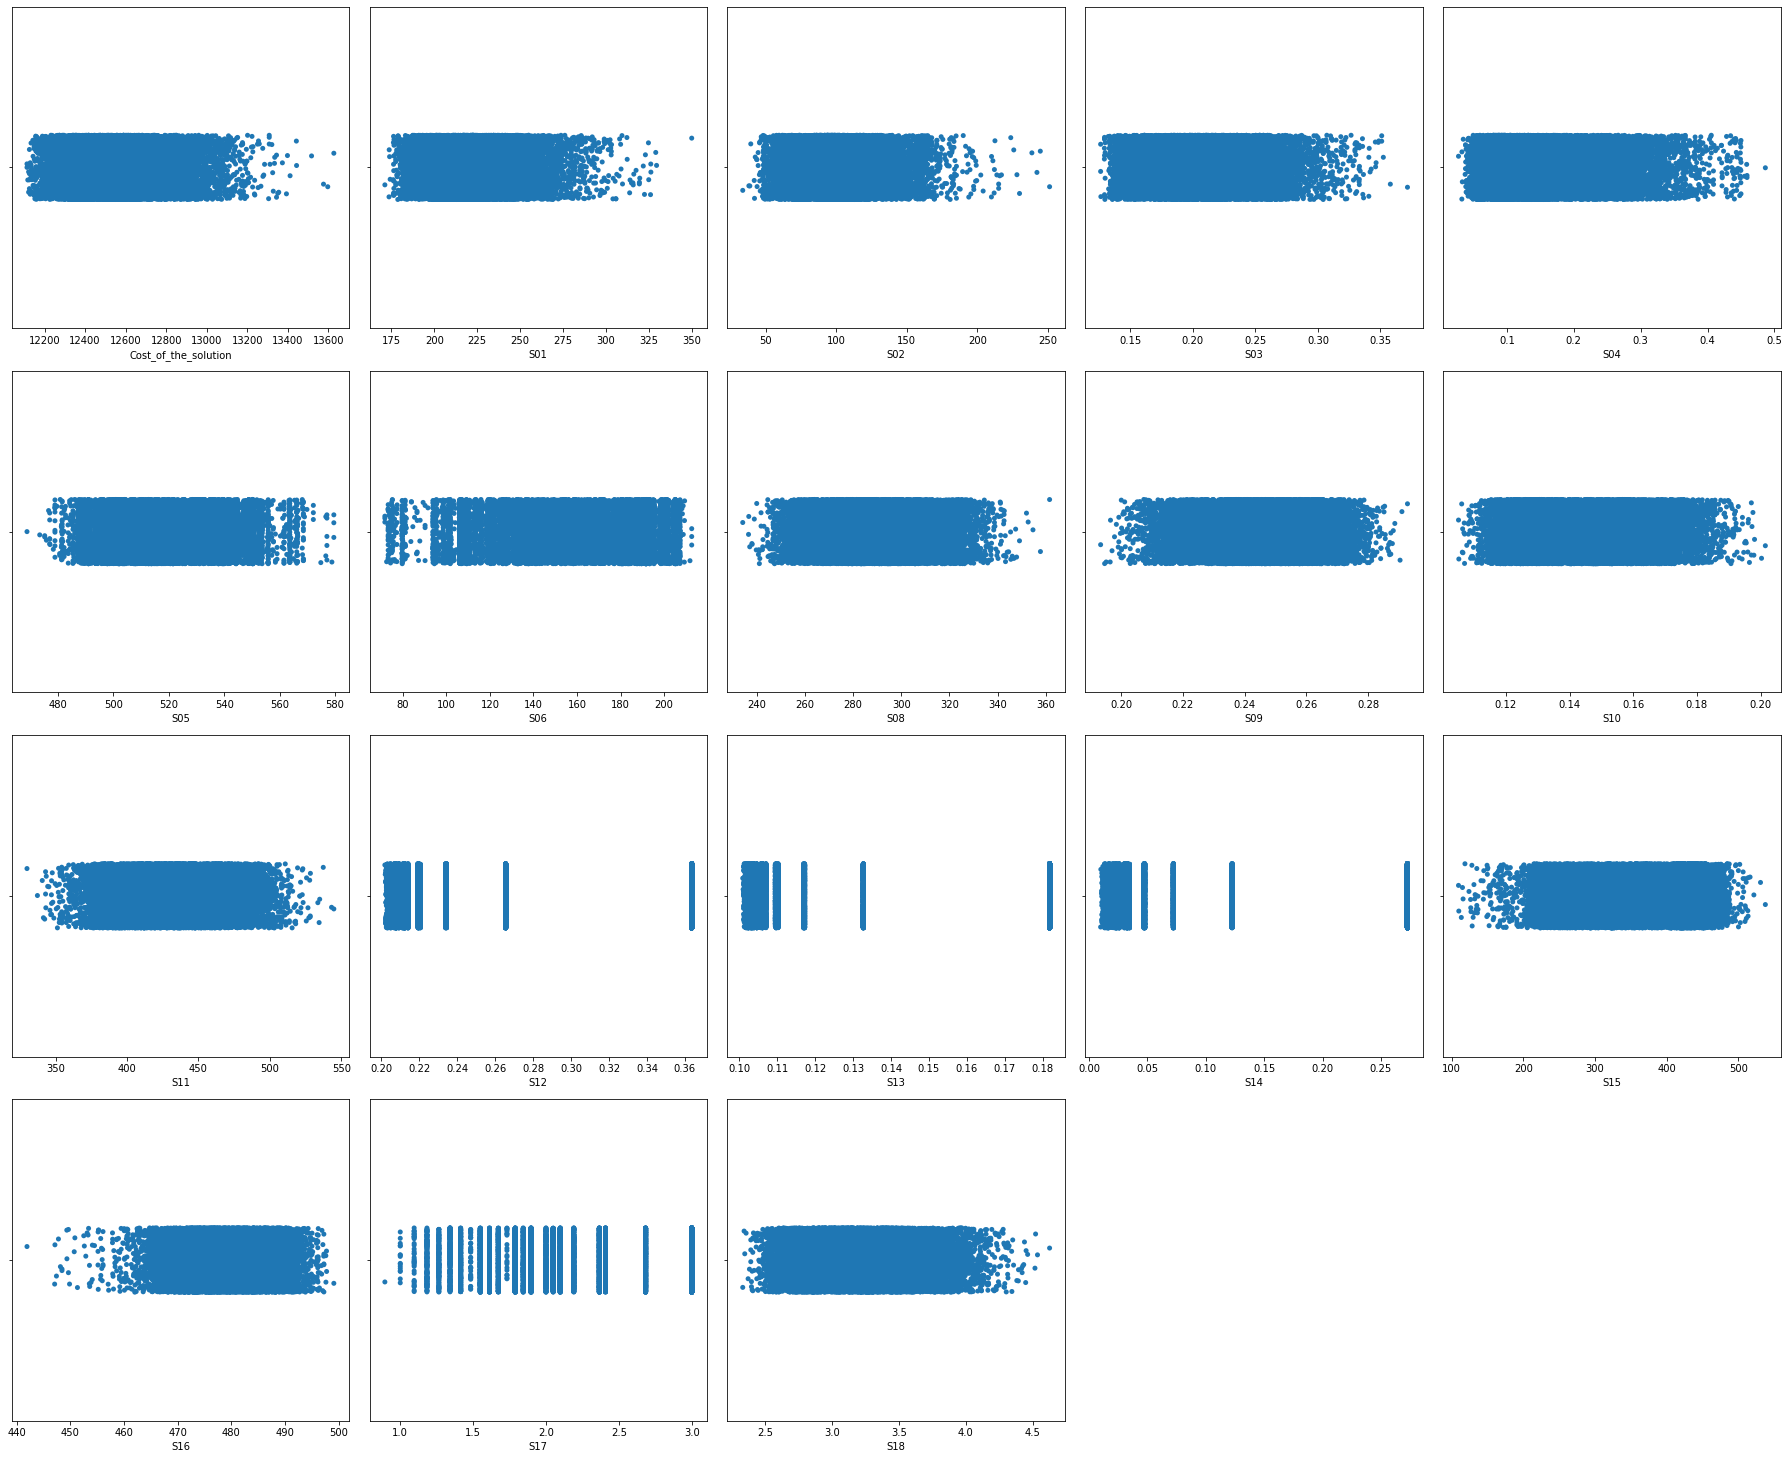

In [373]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.stripplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()


## Multi-Dimension Visualization 

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the cost of the solution) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) (measures how closely two sequences of numbers are correlated), heat map and other ways for feature selection. Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

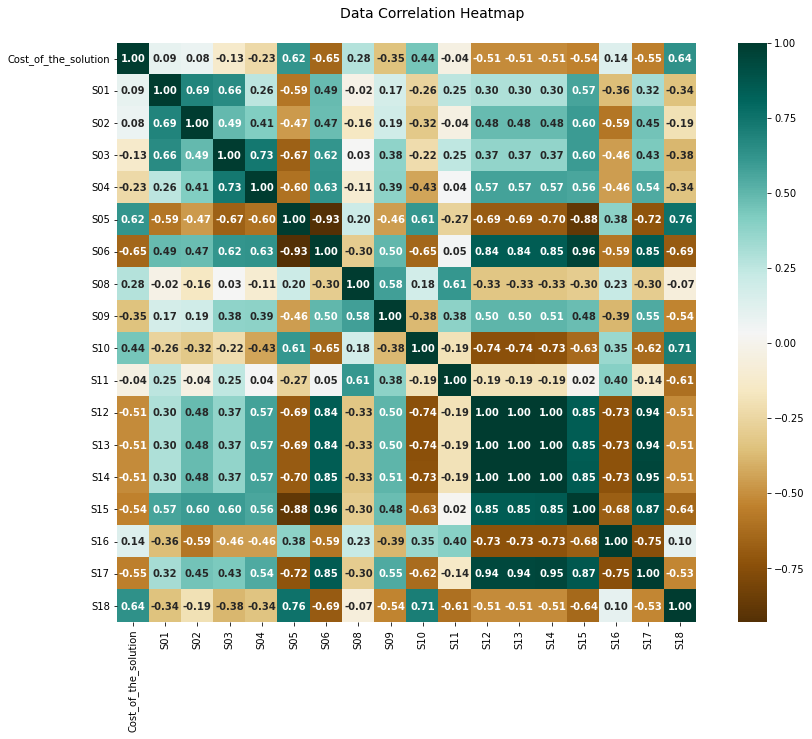

In [374]:
plt.figure(figsize=(15,10))
data_correlation = data.corr()
sns.heatmap(data_correlation,cmap="BrBG",annot=True,fmt='.2f', square=True, annot_kws={'fontsize':10, 'fontweight':'bold'})
plt.subplots_adjust(top=0.93)
t= plt.suptitle('Data Correlation Heatmap', fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

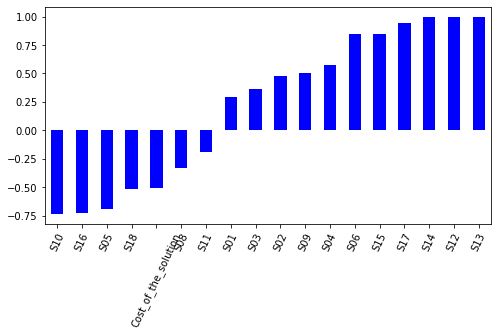

In [375]:
data.corrwith(data['S13']).sort_values().plot(kind='bar', color='blue', figsize=(8,4))
plt.xticks(rotation=65)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

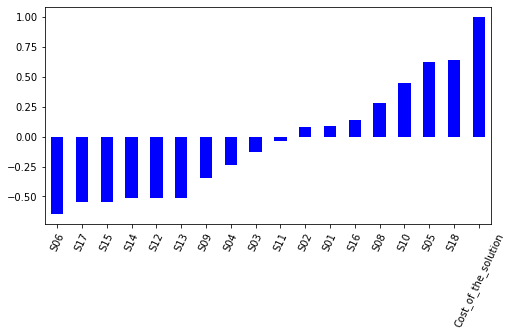

In [376]:
data.corrwith(data['Cost_of_the_solution']).sort_values().plot(kind='bar', color='blue', figsize=(8,4))
plt.xticks(rotation=65)

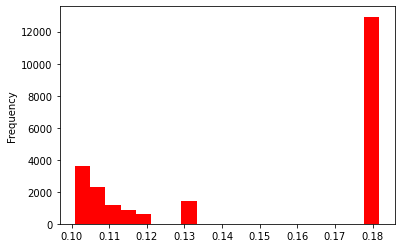

In [377]:
# ploting to see the correlated colums 13 with other. 
data['S13'].plot(kind='hist', color='red', bins=20)


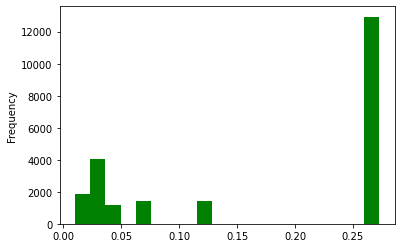

In [378]:
data['S14'].plot(kind='hist', color='green', bins=20)

## Feature Engineering 

In [379]:
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ARDRegression, PassiveAggressiveRegressor

In [380]:
data

Instance_name  Cost_of_the_solution      S01       S02     S03  \
0      XML100_2113_01                 13063  257.768  105.0410  0.2078   
1      XML100_2113_01                 13237  201.777   57.7145  0.1561   
2      XML100_2113_01                 13168  225.720  114.3020  0.1653   
3      XML100_2113_01                 13168  243.308  164.7820  0.2140   
4      XML100_2113_01                 13000  195.334  102.7790  0.1588   
...               ...                   ...      ...       ...     ...   
22818  XML100_2113_01                 12247  207.091   96.7488  0.1864   
22819  XML100_2113_01                 12247  243.833   98.9140  0.2155   
22820  XML100_2113_01                 12247  233.900  112.1430  0.2004   
22821  XML100_2113_01                 12247  213.722   96.3236  0.1860   
22822  XML100_2113_01                 12247  233.752  100.5910  0.2123   

          S04    S05       S06    S08     S09     S10    S11     S12     S13  \
0      0.0803  534.2  133.2030  294.4  0.2274  0.1524  446.5  0.2066  0.1033   
1      0.0349  576.7   74.8466  302.6  0.2275  0.1691  420.3  0.2113  0.1057   
2      0.0572  552.8  112.2280  279.4  0.2105  0.1649  430.8  0.2062  0.1031   
3      0.1242  539.6  157.2250  297.6  0.2452  0.1512  432.2  0.3636  0.1818   
4      0.1049  563.7   79.7384  294.2  0.2256  0.1720  416.4  0.2074  0.1037   
...       ...    ...       ...    ...     ...     ...    ...     ...     ...   
22818  0.1588  496.5  192.5350  263.8  0.2388  0.1264  431.6  0.3636  0.1818   
22819  0.1477  491.0  205.1450  292.1  0.2583  0.1280  468.0  0.3636  0.1818   
22820  0.1324  501.8  191.9040  265.4  0.2397  0.1226  434.1  0.3636  0.1818   
22821  0.1152  496.5  192.5350  286.1  0.2536  0.1292  444.6  0.3636  0.1818   
22822  0.1603  501.8  191.9040  265.9  0.2389  0.1384  409.7  0.3636  0.1818   

          S14      S15      S16     S17     S18  
0      0.0207  327.901  482.077  1.6125  3.5971  
1      0.0321  187.524  489.225  1.7889  4.1107  
2      0.0202  307.325  484.538  1.5492  3.7572  
3      0.2727  403.127  467.493  3.0000  3.5150  
4      0.0233  213.558  490.165  1.6125  3.9475  
...       ...      ...      ...     ...     ...  
22818  0.2727  437.910  483.043  3.0000  2.8950  
22819  0.2727  452.332  479.700  3.0000  2.5150  
22820  0.2727  437.359  475.748  3.0000  2.7350  
22821  0.2727  440.911  482.336  3.0000  2.8500  
22822  0.2727  438.884  477.625  3.0000  3.0700  

[22823 rows x 19 columns]

In [381]:
#Selecting highly correlated features with target variable
cor_target = abs(corr["Cost_of_the_solution"])
relevant_features = cor_target[cor_target>0.2]
relevant_features

Cost_of_the_solution    1.000000
S04                     0.234006
S05                     0.617938
S06                     0.648415
S09                     0.345299
S10                     0.442420
S12                     0.510918
S13                     0.510903
S14                     0.514080
S15                     0.542417
S17                     0.546917
S18                     0.637904
Name: Cost_of_the_solution, dtype: float64

In [382]:
# Adding Instance Name to column names
rel_features = relevant_features.index.tolist()
rel_features.insert(0, 'Instance_name')

In [383]:
#data = data[rel_features]

In [384]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [385]:
correlated = correlation(data, 0.85)
correlated

{'S06', 'S13', 'S14', 'S15', 'S17'}

In [386]:
# Removing just one highly inter-correlated feature
# Dropping S17 only works in subset 3113
# df.drop('S17', axis=1, inplace=True)

In [387]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18'],
      dtype='object')

In [388]:
features = ['S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13',
       'S16', 'S17', 'S18']

target = ['Cost_of_the_solution']
X = data[features]
Y = data[target]

In [389]:
X = data[features]
Y = data[target]

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)


In [391]:
X_train.shape


(15976, 15)

## Regression Models

* Linear Regression
* Ridge Regression
* Lasso Regression
* ARD Regression
* Passive Aggressive Regressor

In [392]:
def model_maker(model=LinearRegression()):
  model.fit(X_train, y_train)
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  sns.barplot(data=pd.DataFrame(model.coef_.reshape(1,15), columns=X_train.columns))
  plt.xticks(rotation=60)
  plt.show()
  return model, score_train, score_test, y_pred_train, y_pred_test

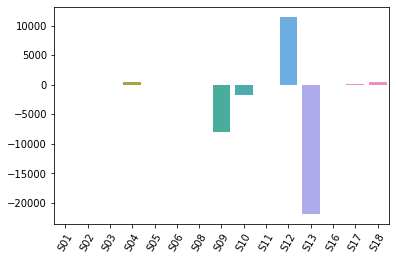

In [393]:
reg = LinearRegression(fit_intercept=True)

reg, score_train_reg, score_test_reg, y_pred_train_reg, y_pred_test_reg = model_maker(model=reg)

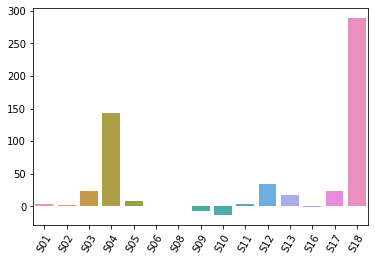

In [394]:
rng = Ridge(solver ='saga')

rng, score_train_rng, score_test_rng, y_pred_train_rng, y_pred_test_rng = model_maker(model=rng)

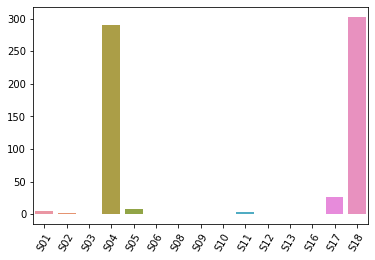

In [395]:
lasso = Lasso(alpha = .8)
lasso, score_train_lasso, score_test_lasso, y_pred_train_lasso, y_pred_test_lasso = model_maker(model=lasso)

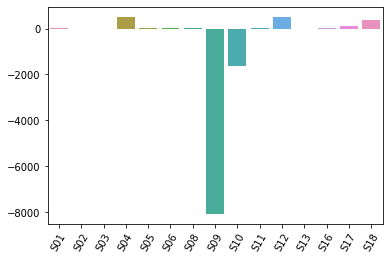

In [396]:
ard = ARDRegression(alpha_1=.9, alpha_2=.9, lambda_1=1e-7, lambda_2=1e-7)

ard, score_train_ard, score_test_ard, y_pred_train_ard, y_pred_test_ard = model_maker(model=ard)

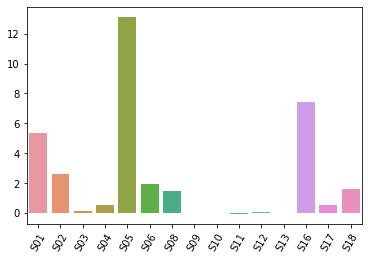

In [397]:
par = PassiveAggressiveRegressor(C=.6, loss='epsilon_insensitive', epsilon=1e-6, random_state=3)

par, score_train_par, score_test_par, y_pred_train_par, y_pred_test_par = model_maker(model=par)

In [398]:
train_scores = [score_train_reg, score_train_rng,  score_train_lasso,  score_train_ard,  score_train_par]  
test_scores = [score_test_reg, score_test_rng,  score_test_lasso,  score_test_ard,  score_test_par]
models =['reg','rng','lasso','ard','par']
dict_scores = {
'Train score':train_scores,'Test score':test_scores}
df_score = pd.DataFrame(dict_scores, index=models)

In [399]:
df_score

Train score  Test score
reg       0.872923    0.867313
rng       0.821155    0.811482
lasso     0.829509    0.820485
ard       0.872911    0.867352
par       0.698783    0.674474

* Random Forest Regressor
* Decision Tree Regressor
* Support Vector Regressor

### Splitting data into train and test data

In [400]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Random Forest

In [401]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [402]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [403]:
y_pred = regressor.predict(X_test)

In [404]:
random_forest_r2 = r2_score(y_test, y_pred)

In [405]:
random_forest_r2

0.884632049339664

add here 

### Decision Tree

In [406]:
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import plotly.graph_objects as go

In [407]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [408]:
decision_tree_r2 = r2_score(y_test, y_pred)

In [409]:
decision_tree_r2

0.884632049339664

In [410]:
print(X_train)

           S01       S02     S03     S04    S05       S06    S08     S09  \
9949   227.011  107.6520  0.2265  0.2255  506.5  187.6020  278.9  0.2481   
3429   241.262  110.7410  0.2832  0.2113  508.2  176.6640  292.9  0.2518   
18430  224.333  105.3260  0.2162  0.1898  510.6  184.6490  284.5  0.2541   
19633  219.245  103.1850  0.2358  0.1951  515.8  165.9260  310.4  0.2686   
21874  243.683  109.7690  0.2442  0.1572  501.8  191.9040  270.4  0.2430   
...        ...       ...     ...     ...    ...       ...    ...     ...   
12239  229.748   98.0932  0.2594  0.2837  491.0  205.1450  280.8  0.2520   
3482   227.575  100.4960  0.2385  0.1443  512.4  172.5320  260.8  0.2315   
12631  224.351   91.9685  0.1920  0.0567  541.5  109.1400  325.0  0.2601   
4723   195.921   95.7410  0.1814  0.1346  531.1  154.6710  295.4  0.2556   
1336   219.740  106.5250  0.1962  0.1503  568.6   73.2928  306.7  0.2382   

          S10    S11     S12     S13      S16     S17     S18  
9949   0.1456  395.0  0

### SVR

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [412]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [413]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [414]:
svr_r2 = r2_score(y_test, y_pred)

### R2 Results

In [415]:
# a function to use for adjusted R^2
rows, feature_count = X.shape

def adj_r2(r2, p_feature_count, n_rows):
    '''Get the adjusted R^2 value.

    Args:
        p_feature_count (int): the number of independent variables.
        n_rows (int): the number of observations.

    '''
    return 1-(1-r2)*(n_rows-1)/(n_rows-p_feature_count-1)

In [416]:
# dictionary of regressions and their R^2 values
r2_dict = {
    'Random Forest Regression': random_forest_r2,
    'Decision Tree Regression': decision_tree_r2,
    'Support Vector Regression (SVR)': svr_r2
}

# default values
best = 0.0
best_name = ''

# print out a table of results
print("{: <40} {: <20} {: <20}".format('Regression', 'R^2', 'Adjusted R^2'))
print('-'*80)
for key, val in r2_dict.items():
    if val > best:
        best = val
        best_name = key
    print("{: <40} {: <20} {: <20}".format(key, val, adj_r2(val, feature_count, rows)))

# print the best result
print('-'*80)
print(best_name, 'gave the best result, R^2:', best)

Regression                               R^2                  Adjusted R^2        
--------------------------------------------------------------------------------
Random Forest Regression                 0.884632049339664    0.8845561726675938  
Decision Tree Regression                 0.884632049339664    0.8845561726675938  
Support Vector Regression (SVR)          0.884632049339664    0.8845561726675938  
--------------------------------------------------------------------------------
Random Forest Regression gave the best result, R^2: 0.884632049339664


## Classification Modeling

1. Logistic Regression
2. Decision Trees
3. k-Nearest Neighbours
4. Support Vector Machines
5. Random Forest ensemble
6. Voting Classifiers

Transformation into a classification problem: we want to create new column that includes categorical variables according to values in the cost of the solution feature.

In [417]:
data['bins'] = pd.qcut(data['Cost_of_the_solution'],
                           q=[0, .25, .5, .75, 1],
                           labels=['bad', 'average', 'good', 'excellent'])
data.head(10)

Instance_name  Cost_of_the_solution      S01       S02     S03     S04  \
0  XML100_2113_01                 13063  257.768  105.0410  0.2078  0.0803   
1  XML100_2113_01                 13237  201.777   57.7145  0.1561  0.0349   
2  XML100_2113_01                 13168  225.720  114.3020  0.1653  0.0572   
3  XML100_2113_01                 13168  243.308  164.7820  0.2140  0.1242   
4  XML100_2113_01                 13000  195.334  102.7790  0.1588  0.1049   
5  XML100_2113_01                 13207  251.384  107.3840  0.1999  0.1005   
6  XML100_2113_01                 13278  256.225  106.6140  0.2884  0.2706   
7  XML100_2113_01                 13251  241.530  155.7650  0.1747  0.0968   
8  XML100_2113_01                 12985  208.343   87.8099  0.1840  0.1112   
9  XML100_2113_01                 12985  275.080  140.7500  0.2519  0.1224   

     S05       S06    S08     S09     S10    S11     S12     S13     S14  \
0  534.2  133.2030  294.4  0.2274  0.1524  446.5  0.2066  0.1033  0.0207   
1  576.7   74.8466  302.6  0.2275  0.1691  420.3  0.2113  0.1057  0.0321   
2  552.8  112.2280  279.4  0.2105  0.1649  430.8  0.2062  0.1031  0.0202   
3  539.6  157.2250  297.6  0.2452  0.1512  432.2  0.3636  0.1818  0.2727   
4  563.7   79.7384  294.2  0.2256  0.1720  416.4  0.2074  0.1037  0.0233   
5  544.5  110.3260  292.3  0.2193  0.1425  457.3  0.2031  0.1016  0.0133   
6  509.0  147.8570  329.9  0.2552  0.1327  528.4  0.2343  0.1172  0.0723   
7  545.6  108.5970  282.8  0.2101  0.1668  402.8  0.2049  0.1024  0.0174   
8  552.6  100.9510  289.6  0.2263  0.1719  395.8  0.2062  0.1031  0.0202   
9  514.5  166.2290  324.3  0.2667  0.1153  479.8  0.3636  0.1818  0.2727   

       S15      S16     S17     S18       bins  
0  327.901  482.077  1.6125  3.5971  excellent  
1  187.524  489.225  1.7889  4.1107  excellent  
2  307.325  484.538  1.5492  3.7572  excellent  
3  403.127  467.493  3.0000  3.5150  excellent  
4  213.558  490.165  1.6125  3.9475  excellent  
5  297.915  490.419  1.1832  3.5627  excellent  
6  355.041  485.796  2.4083  3.0963  excellent  
7  296.475  486.387  1.4142  4.1102  excellent  
8  204.920  486.163  1.5492  4.2083  excellent  
9  412.016  463.648  3.0000  2.9650  excellent

In [418]:
X = data.drop(['Instance_name', 'Cost_of_the_solution'], axis=1)
y = data['bins']

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


### Label Encoding the newly created variables 

In [420]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column


In [421]:
data['bins'] = pd.qcut(data['Cost_of_the_solution'],
                           q=[0,  .5, 1],
                           labels=['bad', 'good'])


In [422]:
data['bins'] = labelencoder.fit_transform(data['bins'])

In [423]:
data.head()

Instance_name  Cost_of_the_solution      S01       S02     S03     S04  \
0  XML100_2113_01                 13063  257.768  105.0410  0.2078  0.0803   
1  XML100_2113_01                 13237  201.777   57.7145  0.1561  0.0349   
2  XML100_2113_01                 13168  225.720  114.3020  0.1653  0.0572   
3  XML100_2113_01                 13168  243.308  164.7820  0.2140  0.1242   
4  XML100_2113_01                 13000  195.334  102.7790  0.1588  0.1049   

     S05       S06    S08     S09     S10    S11     S12     S13     S14  \
0  534.2  133.2030  294.4  0.2274  0.1524  446.5  0.2066  0.1033  0.0207   
1  576.7   74.8466  302.6  0.2275  0.1691  420.3  0.2113  0.1057  0.0321   
2  552.8  112.2280  279.4  0.2105  0.1649  430.8  0.2062  0.1031  0.0202   
3  539.6  157.2250  297.6  0.2452  0.1512  432.2  0.3636  0.1818  0.2727   
4  563.7   79.7384  294.2  0.2256  0.1720  416.4  0.2074  0.1037  0.0233   

       S15      S16     S17     S18  bins  
0  327.901  482.077  1.6125  3.5971     1  
1  187.524  489.225  1.7889  4.1107     1  
2  307.325  484.538  1.5492  3.7572     1  
3  403.127  467.493  3.0000  3.5150     1  
4  213.558  490.165  1.6125  3.9475     1

### Logistic Regression

In [424]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18', 'bins'],
      dtype='object')

In [425]:
features = ['S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13',
       'S16', 'S17', 'S18']

target = ['bins']

In [426]:
X = data[features]
Y = data[target]

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [428]:
clf_names = []
clf_scores = []

In [429]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [430]:
logistic = LogisticRegression(random_state=0)

In [431]:
logistic.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [432]:
print("Logistic Regression Test Accuracy {}".format(logistic.score(X_test,y_test)))
clf_names.append("Logistic Reg.")
clf_scores.append(logistic.score(X_test,y_test))

Logistic Regression Test Accuracy 0.7236242551699965


In [433]:
y_pred = logistic.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 864  257    2  238]
 [ 252 1200    0    2]
 [  15    0 1145  255]
 [ 323   12  221  920]]


In [434]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### XGBoost Classifier 

In [435]:
from xgboost import XGBClassifier

In [436]:
bst = XGBClassifier()

In [437]:
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

In [438]:
print("XGB BOOST  Test Accuracy {}".format(bst.score(X_test,y_test)))
clf_names.append("XGboost.")
clf_scores.append(bst.score(X_test,y_test))

XGB BOOST  Test Accuracy 0.7066246056782335


In [439]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 844  319   21  177]
 [ 246 1195    2   11]
 [  74    9 1133  199]
 [ 369   49  198  860]]


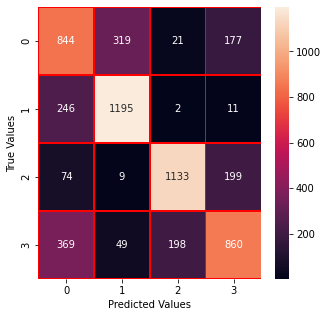

In [440]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### k-Nearest Neighbours

In [441]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [442]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test,average='micro')
    f1_scores.append((k, round(f1_score(y_test, preds,average='micro'), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

F1 Score
K           
1     0.7557
2     0.7175
3     0.7333
4     0.7264
5     0.7308
6     0.7257
7     0.7247
8     0.7212
9     0.7171
10    0.7171
11    0.7145
12    0.7140
13    0.7049
14    0.7080
15    0.7070
16    0.7084
17    0.7049
18    0.7056
19    0.7021
20    0.7021
21    0.7015
22    0.7007
23    0.7017
24    0.7005
25    0.6984
26    0.6956
27    0.6986
28    0.6970
29    0.6961
30    0.6956
31    0.6952
32    0.6952
33    0.6952
34    0.6947
35    0.6931
36    0.6956
37    0.6933
38    0.6916
39    0.6894
40    0.6900
41    0.6884
42    0.6887
43    0.6882
44    0.6873
45    0.6875
46    0.6870
47    0.6875
48    0.6859
49    0.6852
50    0.6868

In [443]:
f1_results.sort_values

<bound method DataFrame.sort_values of      K  F1 Score
0    1    0.7557
1    2    0.7175
2    3    0.7333
3    4    0.7264
4    5    0.7308
5    6    0.7257
6    7    0.7247
7    8    0.7212
8    9    0.7171
9   10    0.7171
10  11    0.7145
11  12    0.7140
12  13    0.7049
13  14    0.7080
14  15    0.7070
15  16    0.7084
16  17    0.7049
17  18    0.7056
18  19    0.7021
19  20    0.7021
20  21    0.7015
21  22    0.7007
22  23    0.7017
23  24    0.7005
24  25    0.6984
25  26    0.6956
26  27    0.6986
27  28    0.6970
28  29    0.6961
29  30    0.6956
30  31    0.6952
31  32    0.6952
32  33    0.6952
33  34    0.6947
34  35    0.6931
35  36    0.6956
36  37    0.6933
37  38    0.6916
38  39    0.6894
39  40    0.6900
40  41    0.6884
41  42    0.6887
42  43    0.6882
43  44    0.6873
44  45    0.6875
45  46    0.6870
46  47    0.6875
47  48    0.6859
48  49    0.6852
49  50    0.6868>

Text(0.5, 1.0, 'KNN F1 Score')

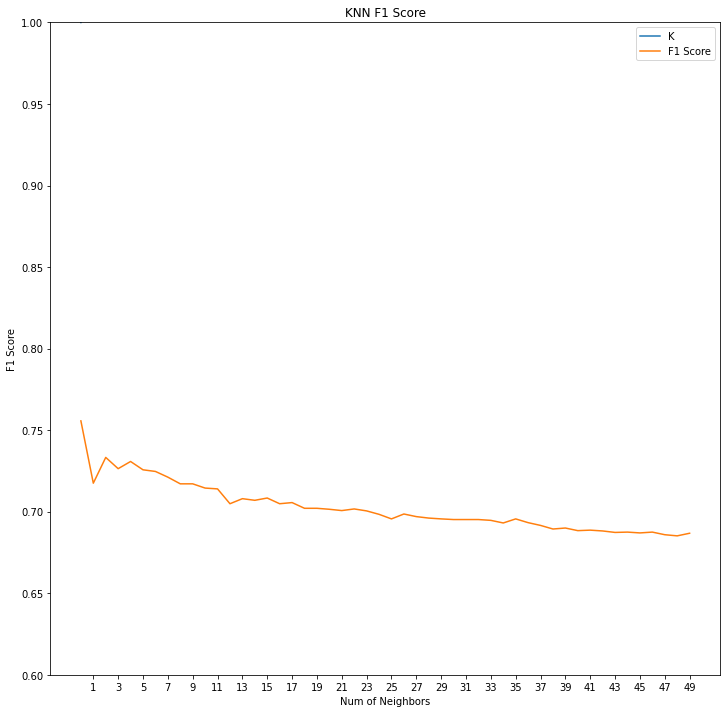

In [444]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.6, 1))
plt.title('KNN F1 Score')

In [445]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred = clf_knn.predict(X_test)

K-Nearest Neighbours Test Accuracy 0.7332632316859446
[[ 950  277    8  126]
 [ 208 1236    0   10]
 [ 105    5 1069  236]
 [ 383   41  123  929]]


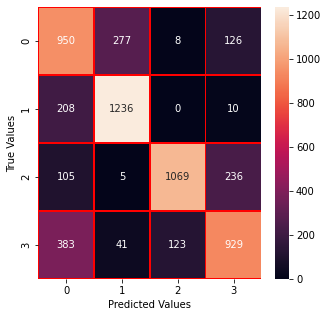

In [446]:
print("K-Nearest Neighbours Test Accuracy {}".format(clf_knn.score(X_test,y_test)))
clf_names.append("K-NN")
clf_scores.append(clf_knn.score(X_test,y_test))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [447]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[ 950  277    8  126]
 [ 208 1236    0   10]
 [ 105    5 1069  236]
 [ 383   41  123  929]]


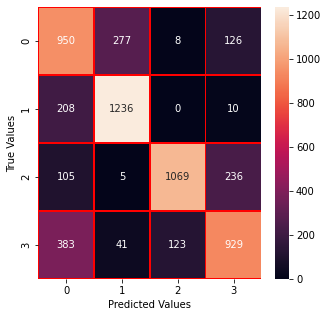

In [448]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Support Vector Machines

The `SVC` model provided by sklearn has two important arguments to be tuned: regularization parameter `C` and `kernel`.
The `C` argument is a regularization parameter.

*   For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
*   Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)
*   `poly`: Polynomial Kernel
*   `sigmoid`: Sigmoid Kernel


In [449]:
from sklearn.svm import SVC

In [450]:
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [451]:
print("SVM Test Accuracy {}".format(svm.score(X_test,y_test)))
clf_names.append("SVM")
clf_scores.append(svm.score(X_test,y_test))

SVM Test Accuracy 0.772695408342096


In [452]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 960  199    2  200]
 [ 222 1230    0    2]
 [  10    0 1177  228]
 [ 269    4  161 1042]]


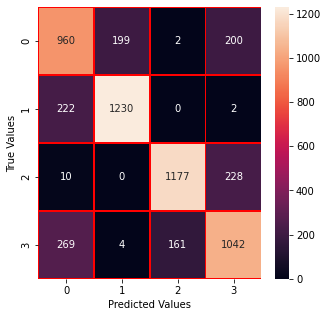

In [453]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [454]:
from sklearn.metrics import precision_recall_fscore_support

In [455]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    sns.barplot(data =pd.DataFrame([results_pos]))
    return results_pos

{'accuracy': 0.772695408342096,
 'recall': 0.772695408342096,
 'precision': 0.772695408342096,
 'f1score': 0.772695408342096}

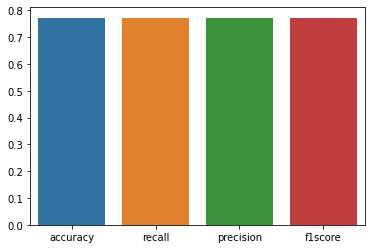

In [456]:
evaluate_metrics(y_test, y_pred)

### Decision Trees

In [457]:
from sklearn.tree import DecisionTreeClassifier

In [458]:
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

In [459]:
print("Descision Tree Score: ",decision_tree.score(X_test,y_test))
clf_names.append("Random Forest")
clf_scores.append(decision_tree.score(X_test,y_test))

Descision Tree Score:  0.7457062740974413


In [460]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 920  235   51  155]
 [ 238 1163    5   48]
 [  51    4 1163  197]
 [ 223   51  193 1009]]


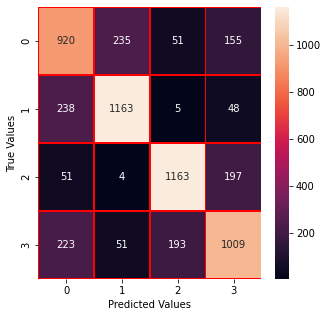

In [461]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Random Forest ensemble

In [462]:
from sklearn.ensemble import RandomForestClassifier

In [463]:
rand_forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_forest.fit(X_train,y_train)
y_pred = rand_forest.predict(X_test)

In [464]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1031  191   18  121]
 [ 204 1242    0    8]
 [  62    5 1204  144]
 [ 298   29  189  960]]


In [465]:
print("Random Forest Score: ",rand_forest.score(X_test,y_test))
clf_names.append("Random Forest")
clf_scores.append(rand_forest.score(X_test,y_test))

Random Forest Score:  0.777602523659306


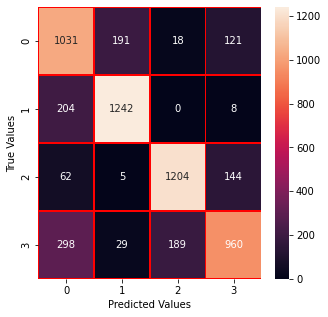

In [466]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Compare all of these Classification Models

Text(0, 0.5, 'Classifier Score')

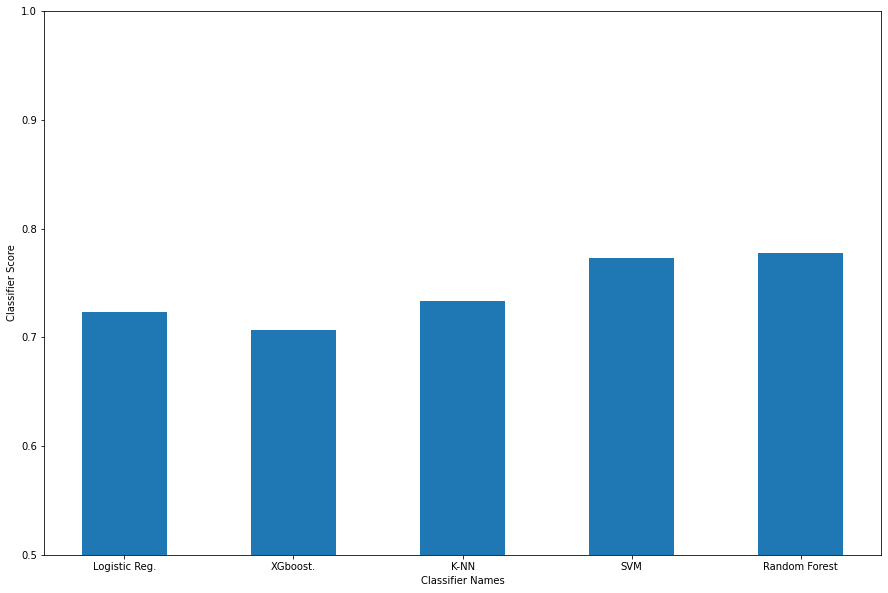

In [467]:
plt.figure(figsize=(15,10))
plt.ylim([0.5,1])
plt.bar(clf_names,clf_scores,width=0.5)
plt.xlabel('Classifier Names')
plt.ylabel('Classifier Score')

### Neural Network 

## Conclusion 